In [ ]:
!sudo pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1fFKvR46KP-tFEUuoc1FOs_y0HROLkVeb

In [ ]:
!mkdir -p data
!mv train_meta.pkl data/

In [1]:
from WikiSeriesNN import WikiSeriesNN

from WikiPlot import plot_prediction
from Seq2SeqConv import Seq2SeqConv
from Seq2SeqConvFull import Seq2SeqConvFull
from Seq2Seq import Seq2Seq
from os import path
import pickle
from PerformanceMetrics import smape

import ipywidgets as widgets

Using TensorFlow backend.


In [2]:
root_folder = "./data"
train_file = path.join(root_folder,"train_meta.pkl")

In [3]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [4]:
saved_path = path.join(root_folder,"savedSeq2Seq.h5")
seq2seq = Seq2Seq(series,60)
seq2seq.load_model(saved_path)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60


W0622 18:55:11.688514 140516411877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 18:55:11.705719 140516411877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 18:55:11.709455 140516411877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 18:55:11.786858 140516411877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0622 18:55:11.796679 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 50), (None,  10400       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 50), ( 10400       input_2[0][0]                    
                                                                 lstm_1[0][1]                     
          

W0622 18:55:12.812784 140516411877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
saved_path = path.join(root_folder,"seqConv.h5")
seq2seqConv = Seq2SeqConv(series,60)
seq2seqConv.load_model(saved_path)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          208

W0622 18:55:21.794896 140516411877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
saved_path = path.join(root_folder,"seqConvFull.h5")
seq2seqConvFull = Seq2SeqConvFull(series,60)
seq2seqConvFull.load_model(saved_path)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, None, 16)     32          input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, None, 32)     1056        conv1d_12[0][0]                  
_________________________

In [7]:
remaining_metas = series
langs_names = remaining_metas.meta['lang'].unique()
lang_dropdown = widgets.Dropdown(
    options=langs_names,
    value=langs_names[0],
    description='Lang:',
    disabled=False,
)
lang_dropdown

Dropdown(description='Lang:', options=('zh', 'fr', 'en', 'ru', 'de', 'ja', 'es'), value='zh')

In [8]:
remaining_metas = remaining_metas.meta[series.meta['lang'] == lang_dropdown.value]
page_names = remaining_metas['name'].unique()
page_dropdown = widgets.Dropdown(
    options=page_names,
    value=page_names[0],
    description='Page name:',
    disabled=False,
)
page_dropdown

Dropdown(description='Page name:', options=('1984 (roman)', '24 Heures du Mans', '24 Heures du Mans 2016', '2 …

In [9]:
remaining_metas = remaining_metas[remaining_metas['name'] == page_dropdown.value]
accesses_names = remaining_metas['access'].unique()
accesses_dropdown = widgets.Dropdown(
    options=accesses_names,
    value=accesses_names[0],
    description='Access:',
    disabled=False,
)
accesses_dropdown

Dropdown(description='Access:', options=('desktop',), value='desktop')

In [10]:
remaining_metas = remaining_metas[remaining_metas['access'] == accesses_dropdown.value]
agent_names = remaining_metas['agent'].unique()
agent_dropdown = widgets.Dropdown(
    options=agent_names,
    value=agent_names[0],
    description='Agent:',
    disabled=False,
)
agent_dropdown

Dropdown(description='Agent:', options=('all-agents',), value='all-agents')

In [11]:
index, meta,encode,target = seq2seq.series.get_sample(page_name=page_dropdown.value,lang=lang_dropdown.value,access=accesses_dropdown.value,agent=agent_dropdown.value)

       name lang   access       agent
3303  Acier   fr  desktop  all-agents


/home/jupyter/WikiSeriesNN.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index = self.meta[self.meta['name'] == page_name][self.meta['lang'] == lang][self.meta['access'] == access][self.meta['agent'] == agent]


## Prediction with standard Seq2Seq

### Day by day forecast - Feeding truth

SMAPE: 27.739728974330987


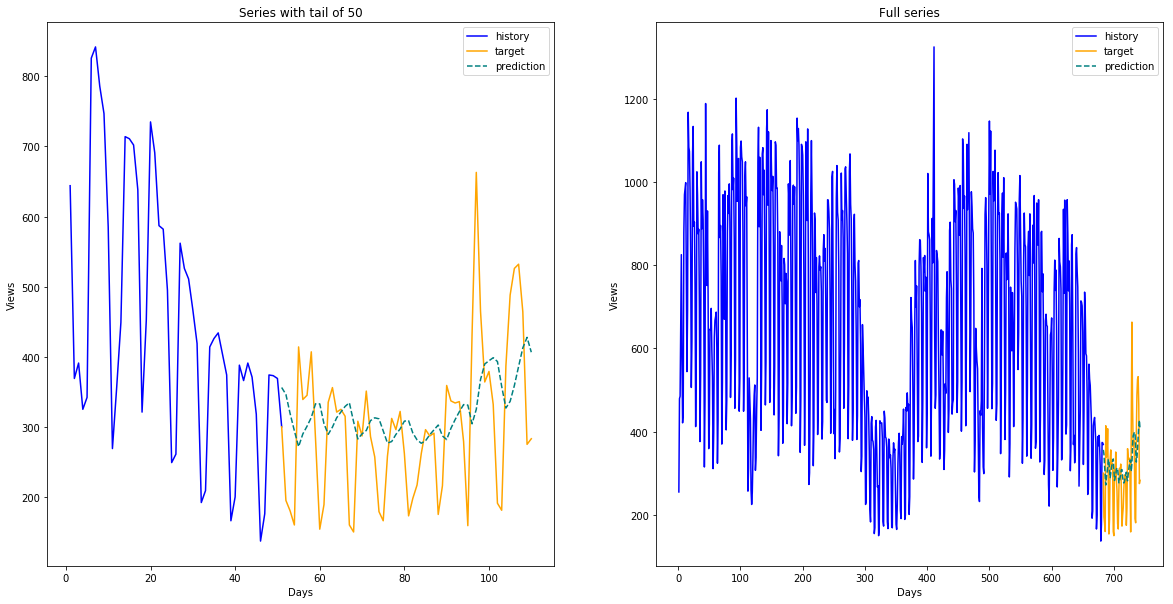

In [12]:
predict = seq2seq.predict(encode,target,True)
encode_denorm,target_denorm,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,index)
print("SMAPE: "+ str(smape(target_denorm,predict)))
plot_prediction(encode_denorm,target_denorm,predict)

### 60 days forecast - Feeding predictions

SMAPE: 42.67400815959901


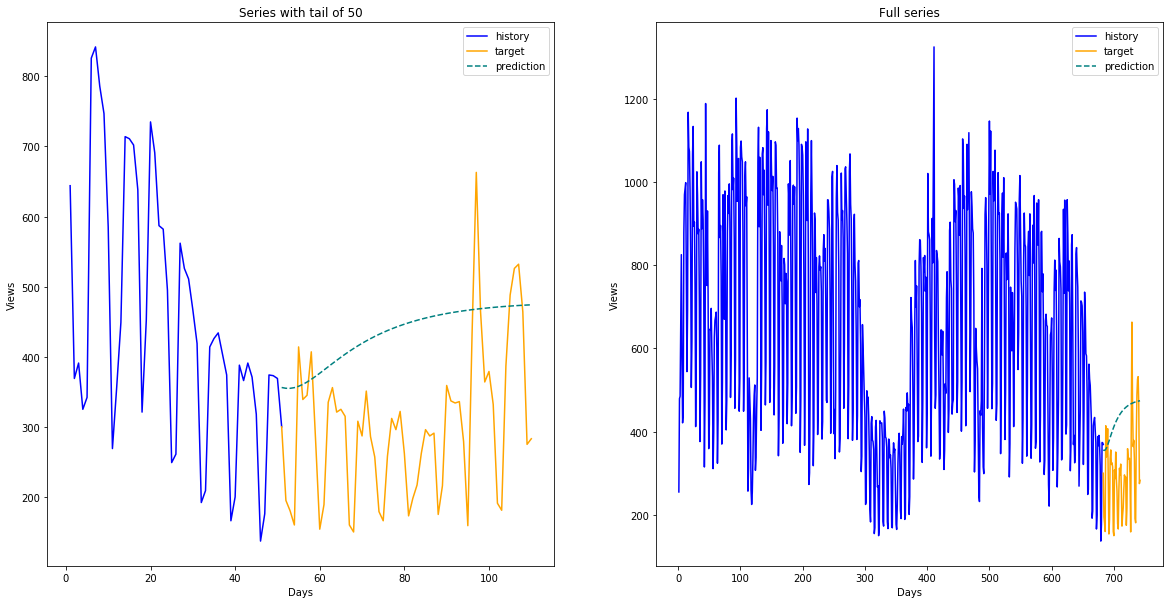

In [13]:
predict = seq2seq.predict(encode,target,False)
encode_denorm,target_denorm,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,index)
print("SMAPE: "+ str(smape(target_denorm,predict)))
plot_prediction(encode_denorm,target_denorm,predict)

## Prediction with convolutional Seq2Seq

### Day by day forecast - Feeding truth

SMAPE: 13.117010497032815


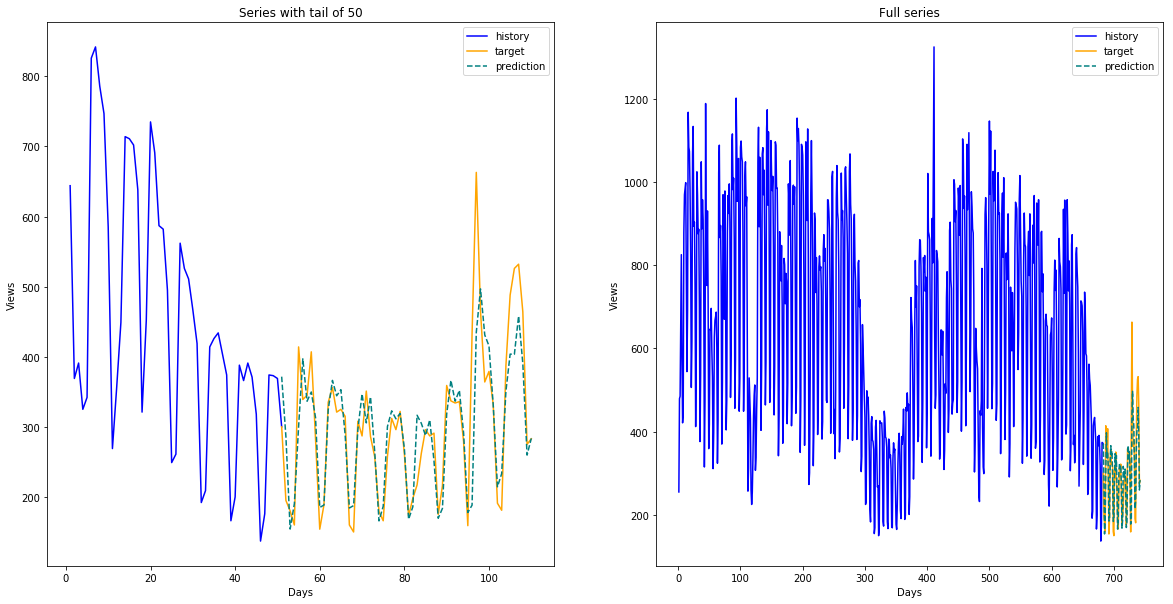

In [14]:
predict = seq2seqConv.predict(encode,target,True)
encode_denorm,target_denorm,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,index)
print("SMAPE: "+ str(smape(target_denorm,predict)))
plot_prediction(encode_denorm,target_denorm,predict)

### 60 days forecast - Feeding predictions

SMAPE: 21.82173242102349


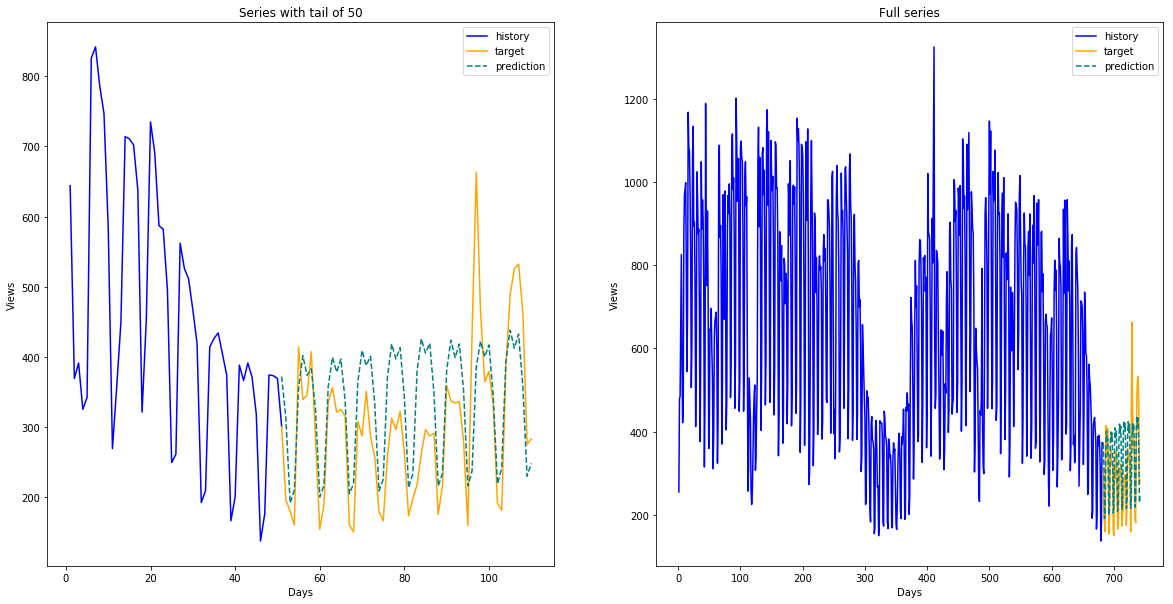

In [15]:
predict = seq2seqConv.predict(encode,target,False)
encode_denorm,target_denorm,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,index)
print("SMAPE: "+ str(smape(target_denorm,predict)))
plot_prediction(encode_denorm,target_denorm,predict)

## Prediction with Wavenet Seq2Seq

### Day by day forecast - Feeding truth

SMAPE: 12.565916372557465


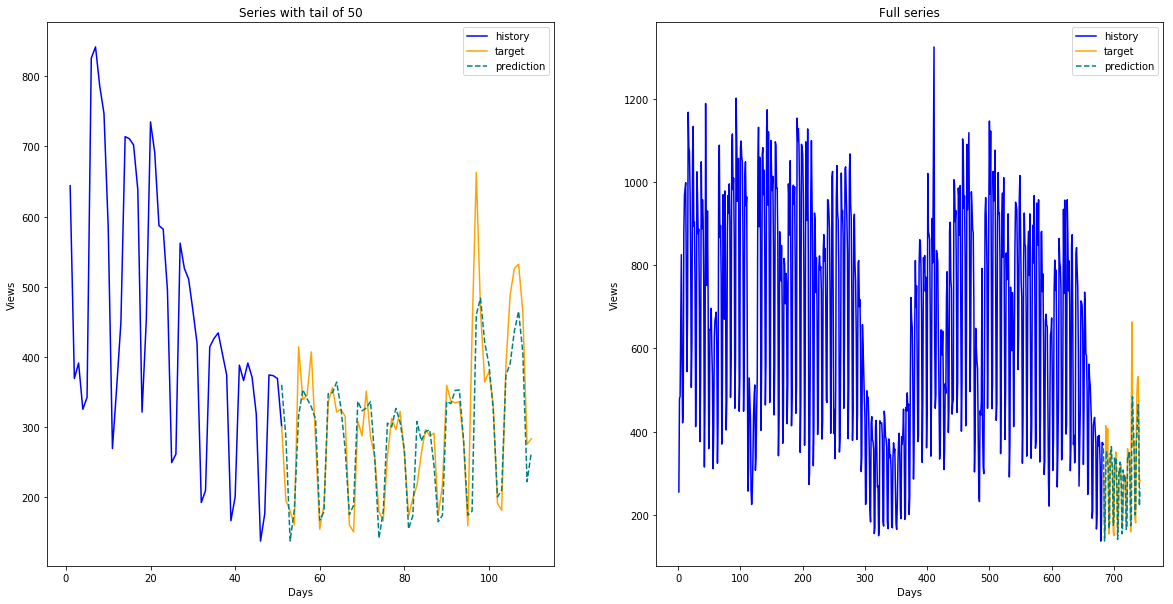

In [16]:
predict = seq2seqConvFull.predict(encode,target,True)
encode_denorm,target_denorm,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,index)
print("SMAPE: "+ str(smape(target_denorm,predict)))
plot_prediction(encode_denorm,target_denorm,predict)

### 60 days forecast - Feeding predictions

SMAPE: 16.61228370254348


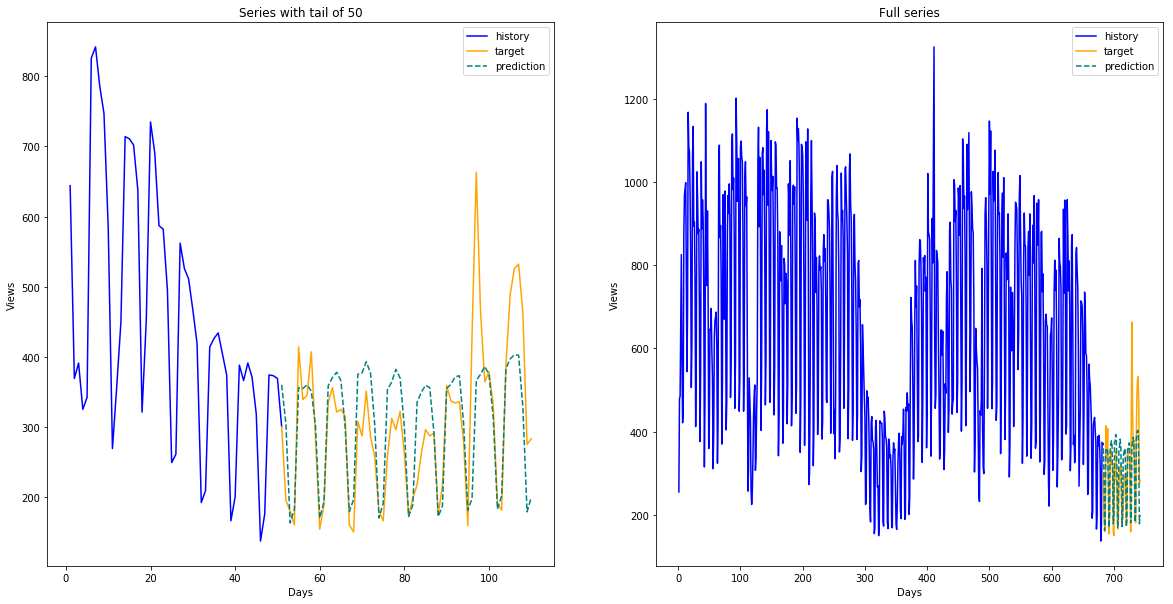

In [17]:
predict = seq2seqConvFull.predict(encode,target,False)
encode_denorm,target_denorm,predict = seq2seq.normalise_reshape_prediction(encode,target,predict,index)
print("SMAPE: "+ str(smape(target_denorm,predict)))
plot_prediction(encode_denorm,target_denorm,predict)